In [2]:
%pylab notebook
import numpy as np
import matplotlib

import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import csv
import codecs

from scipy.interpolate import interp2d
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


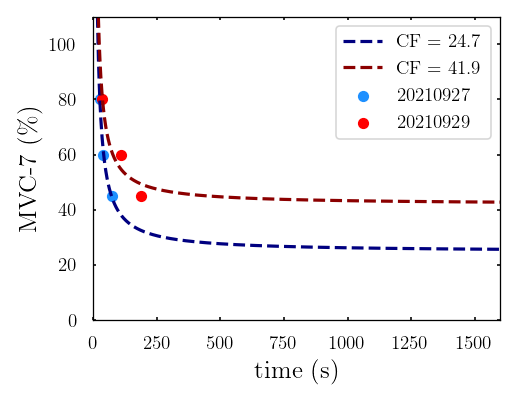

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in true_divide
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in true_divide


In [3]:
##############################Initialise#####################################################
nrow = 1
ncol = 1
xsize = 4.5
ysize = 3.5


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 10

#set global tick parameters
majw = axew #major tick width
majl = 2.0 #major tick length
minw = axew #minor tick width
minl = 2.0 #minor tick length

#set global font sizes
axefont = 12 #axis label font size
numsize = 12 #axis number font size
legfont = 12 #legend font size
labelfont=16

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))


ax.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
ax.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
ax.set_ylabel(r'MVC-7 (\%)', fontsize = labelfont)
ax.set_xlabel(r'time (s)', fontsize = labelfont)

#############################################################################################
#labels


#############################################################################################
time_20210927 = [27, 39, 76]
mvc7_20210927 = [80,60,45]

time_20210929 = [36, 109, 188]
mvc7_20210929 = [80,60,45]

p1a = ax.scatter(time_20210927,mvc7_20210927, color = 'dodgerblue',label='20210927')
p2a = ax.scatter(time_20210929,mvc7_20210929, color = 'red',label='20210929')

def CFFit(t, CF, W):
    return CF + W/t
max_time = 1600

#print line fit
time_fit = linspace(0, max_time,1000)
popt, pcov = curve_fit(CFFit, time_20210927, mvc7_20210927,bounds=([10,20],[50,3000]))
p1b = ax.plot(time_fit, CFFit(time_fit, *popt),'--', linewidth = 2, color = 'navy',label='CF = %.1f' %(popt[0]))

popt, pcov = curve_fit(CFFit, time_20210929, mvc7_20210929,bounds=([10,20],[50,3000]))
p2b = ax.plot(time_fit, CFFit(time_fit, *popt),'--', linewidth = 2, color = 'darkred',label='CF = %.1f' %(popt[0]))

ax.set_xlim(0, max_time)
ax.set_ylim(0, 110)

fig.set_facecolor('w')
ax.legend(fontsize = legfont)

matplotlib.pyplot.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0.4)
#plt.savefig("SBAND_Measurement_Comparison.png", dpi=400)

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  # This is added back by InteractiveShellApp.init_path()


<IPython.core.display.Javascript object>


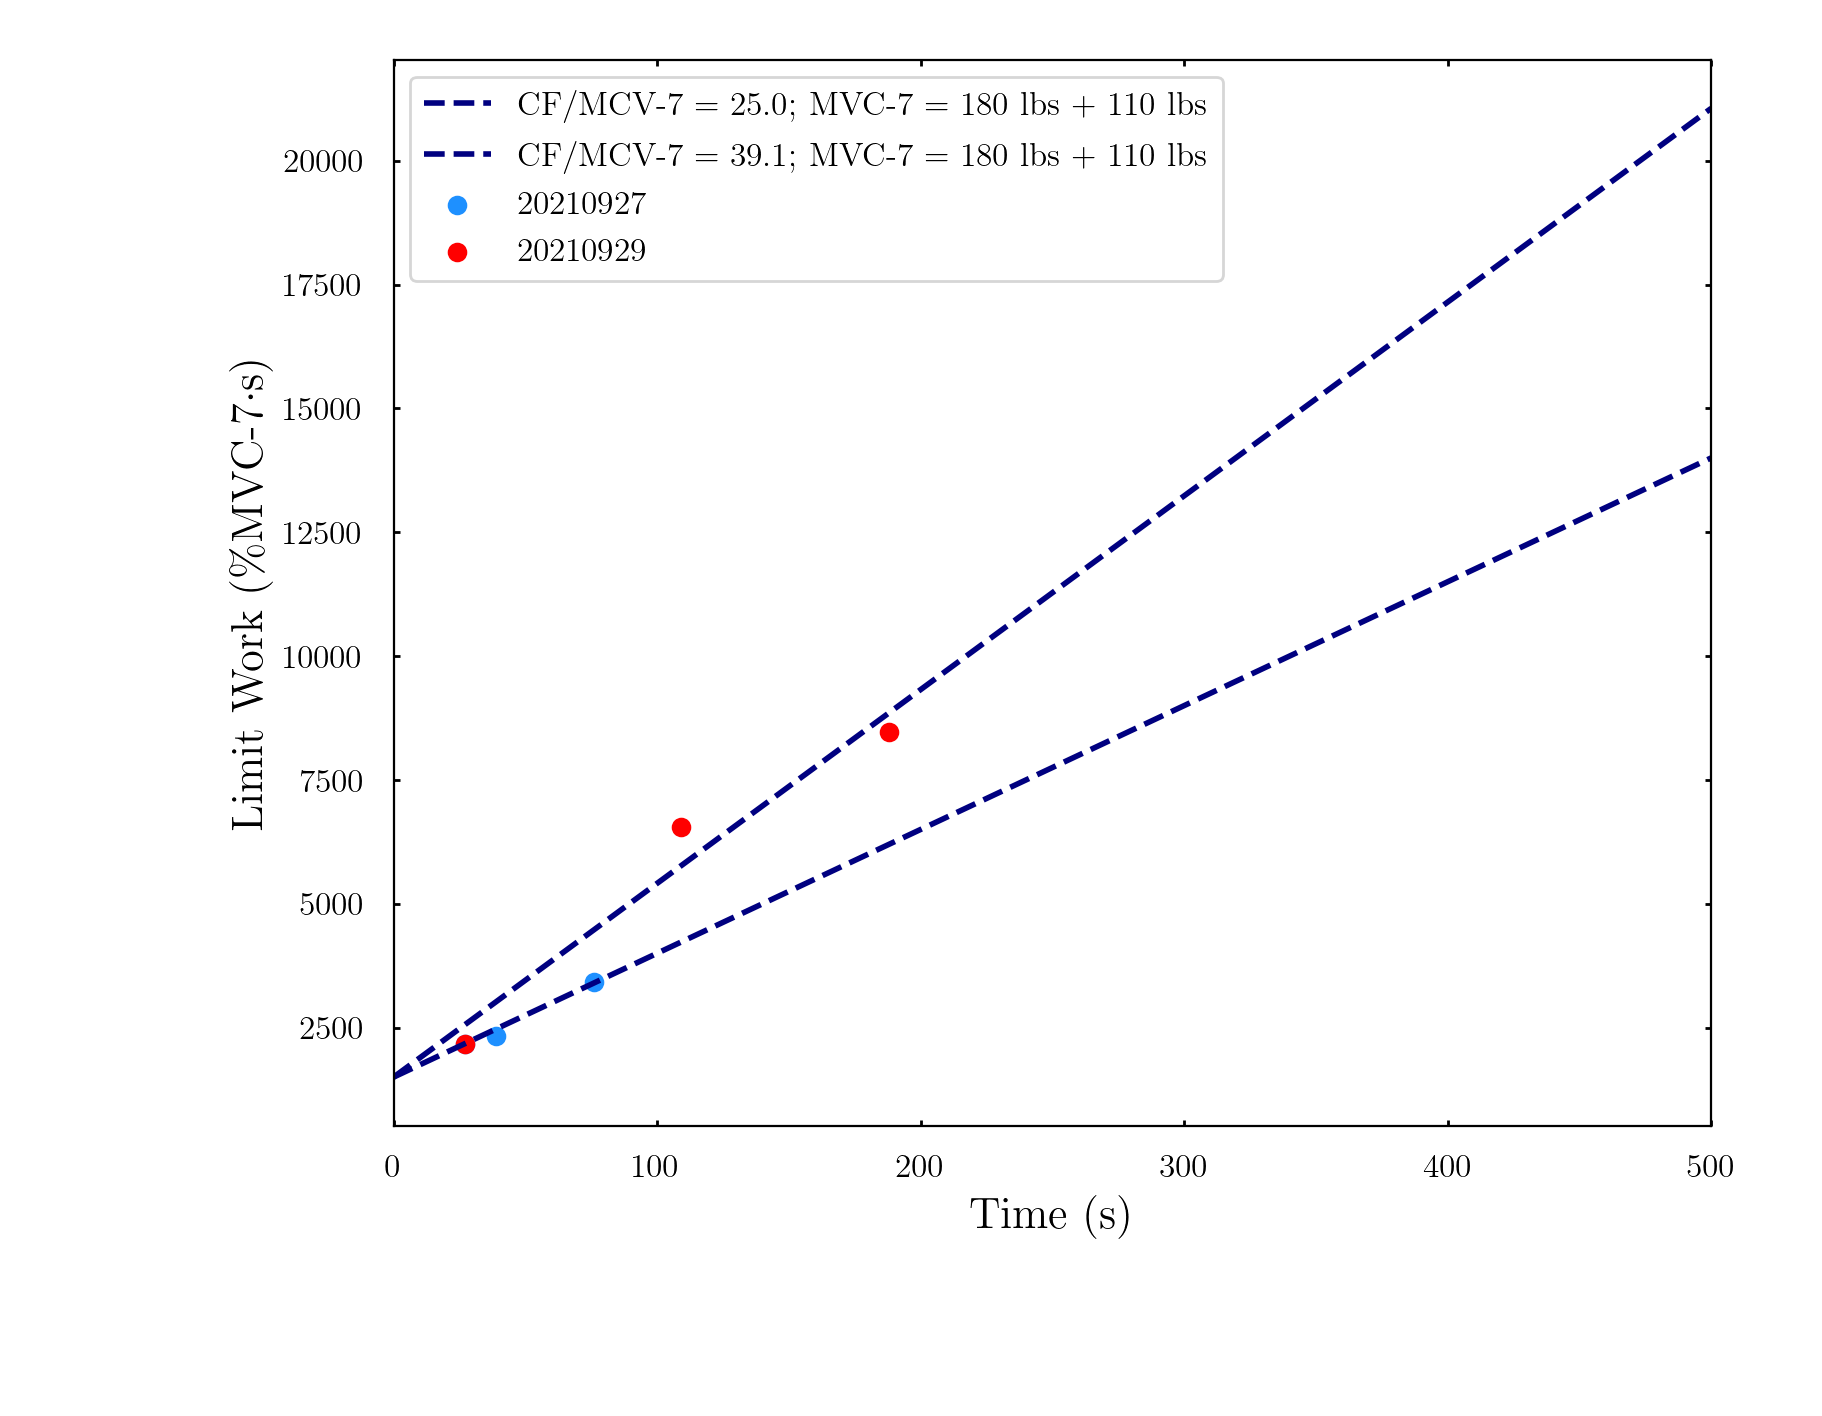

In [7]:
##############################Initialise#####################################################
nrow = 1
ncol = 1
xsize = 4.5
ysize = 3.5


#############################################################################################
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

#set global plotting parameters
linew = 5.0 #line width
#msize = 14 #marker size
axew = 1.0 #axes width

#set the distance to offset the numbers from the ticks
numpad = 10

#set global tick parameters
majw = axew #major tick width
majl = 2.0 #major tick length
minw = axew #minor tick width
minl = 2.0 #minor tick length

#set global font sizes
axefont = 12 #axis label font size
numsize = 12 #axis number font size
legfont = 12 #legend font size
labelfont=16

fig, ax = plt.subplots(nrows=nrow, ncols=ncol, figsize=(xsize,ysize))


ax.tick_params(axis='x',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='x',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,top='off')
ax.tick_params(axis='y',which='major',width=majw,length=majl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
ax.tick_params(axis='y',which='minor',width=minw,length=minl,labelsize=numsize,zorder=1,direction='in',pad=numpad,right='off')
ax.set_ylabel(r'Limit Work (\%MVC-7$\cdot$s)', fontsize = labelfont)
ax.set_xlabel(r'Time (s)', fontsize = labelfont)

#############################################################################################
#labels


#############################################################################################
time_20210927 = [27, 39, 76]
mvc7_20210927 = [80,60,45]

time_20210929 = [27, 109, 188]
mvc7_20210929 = [80,60,45]

p1a = ax.scatter(time_20210927,np.multiply(mvc7_20210927,time_20210927), color = 'dodgerblue',label='20210927')
p2a = ax.scatter(time_20210929,np.multiply(mvc7_20210929,time_20210929), color = 'red',label='20210929')
def CFFit(t, CF, W):
    return CF*t+W
max_time = 500

#print line fit
time_fit = linspace(0, max_time,1000)
popt, pcov = curve_fit(CFFit, time_20210927, np.multiply(mvc7_20210927,time_20210927),bounds=([25,1500],[40,10000]))
p2a = ax.plot(time_fit, CFFit(time_fit, *popt),'--', linewidth = 2, color = 'navy',label='CF/MCV-7 = %.1f; MVC-7 = 180 lbs + 110 lbs' %(popt[0]))

time_fit = linspace(0, max_time,1000)
popt, pcov = curve_fit(CFFit, time_20210929, np.multiply(mvc7_20210929,time_20210929),bounds=([25,1500],[40,10000]))
p2b = ax.plot(time_fit, CFFit(time_fit, *popt),'--', linewidth = 2, color = 'navy',label='CF/MCV-7 = %.1f; MVC-7 = 180 lbs + 110 lbs' %(popt[0]))


ax.set_xlim(0, max_time)
#ax.set_ylim(0, 110)

fig.set_facecolor('w')
ax.legend(fontsize = legfont)

matplotlib.pyplot.tight_layout()

fig.subplots_adjust(wspace=0, hspace=0.4)
#plt.savefig("SBAND_Measurement_Comparison.png", dpi=400)

In [106]:
popt

array([  26.20721979, 1908.8075922 ])